In [2]:
import pandas as pd
import numpy as np
import pickle
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df = pd.read_pickle('./nov_conn.pickle')
# print(df .head(5))

In [4]:
df.columns

Index(['visit_time_utc', 'login_type', 'age_range', 'gender', 'postal_code',
       'total_dwell_min', 'top_space_1_name', 'top_space_1_dwell_min',
       'top_space_2_name', 'top_space_2_dwell_min',
       ...
       'top_space_56_name', 'top_space_56_dwell_min', 'top_space_57_name',
       'top_space_57_dwell_min', 'top_space_58_name', 'top_space_58_dwell_min',
       'top_space_59_name', 'top_space_59_dwell_min', 'top_space_60_name',
       'top_space_60_dwell_min'],
      dtype='object', length=126)

In [5]:
df.gender.unique()

array(['male', 'female', nan, 'other', 'female (hidden)', 'male (hidden)'], dtype=object)

In [6]:
df.age_range.unique()

array(['15~30', nan, '30~45', '60~75', '45~60', '75+', '0~15'], dtype=object)

In [7]:
df.dropna(subset=['gender', 'age_range'], inplace=True)

In [8]:
df.head()

,visit_time_utc,login_type,age_range,gender,postal_code,total_dwell_min,top_space_1_name,top_space_1_dwell_min,top_space_2_name,top_space_2_dwell_min,...,top_space_56_name,top_space_56_dwell_min,top_space_57_name,top_space_57_dwell_min,top_space_58_name,top_space_58_dwell_min,top_space_59_name,top_space_59_dwell_min,top_space_60_name,top_space_60_dwell_min
0,2017-11-01,f,15~30,male,M3H 5K3,44,La Senza,44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-01,f,15~30,female,M6M 2A1,8,Hudson's Bay,8,Forever 21,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-01,f,15~30,male,L1W 1B9,25,The Cheesecake Factory,17,Jack & Jones,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-11-01,f,15~30,male,L4H3A8,293,Pandora,179,Davids,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-11-01,f,15~30,female,M8W1X6,7,Mappins,5,Sporting Life,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.gender.unique()

array(['male', 'female', 'other', 'female (hidden)', 'male (hidden)'], dtype=object)

In [10]:
d = {'male':0, 'female':1, 'female (hidden)':1, 'male (hidden)':0, 'other':2}
df['gender'] = df['gender'].map(d)

In [11]:
df = df[df['gender'] != 2]

In [12]:
df.gender.unique()

array([0, 1], dtype=int64)

In [13]:
df.age_range.unique()

array(['15~30', '30~45', '60~75', '45~60', '75+', '0~15'], dtype=object)

In [14]:
# d = {'0~15':'youth','15~30':'young', '30~45':'middle', '45~60':'mature', '60~75':'older', '75+':'old' }
d = {'0~15':1,'15~30':2, '30~45':3, '45~60':4, '60~75':5, '75+':6}
df['age'] = df.loc[:, 'age_range'].map(d)

In [15]:
df.age.unique()

array([2, 3, 5, 4, 6, 1], dtype=int64)

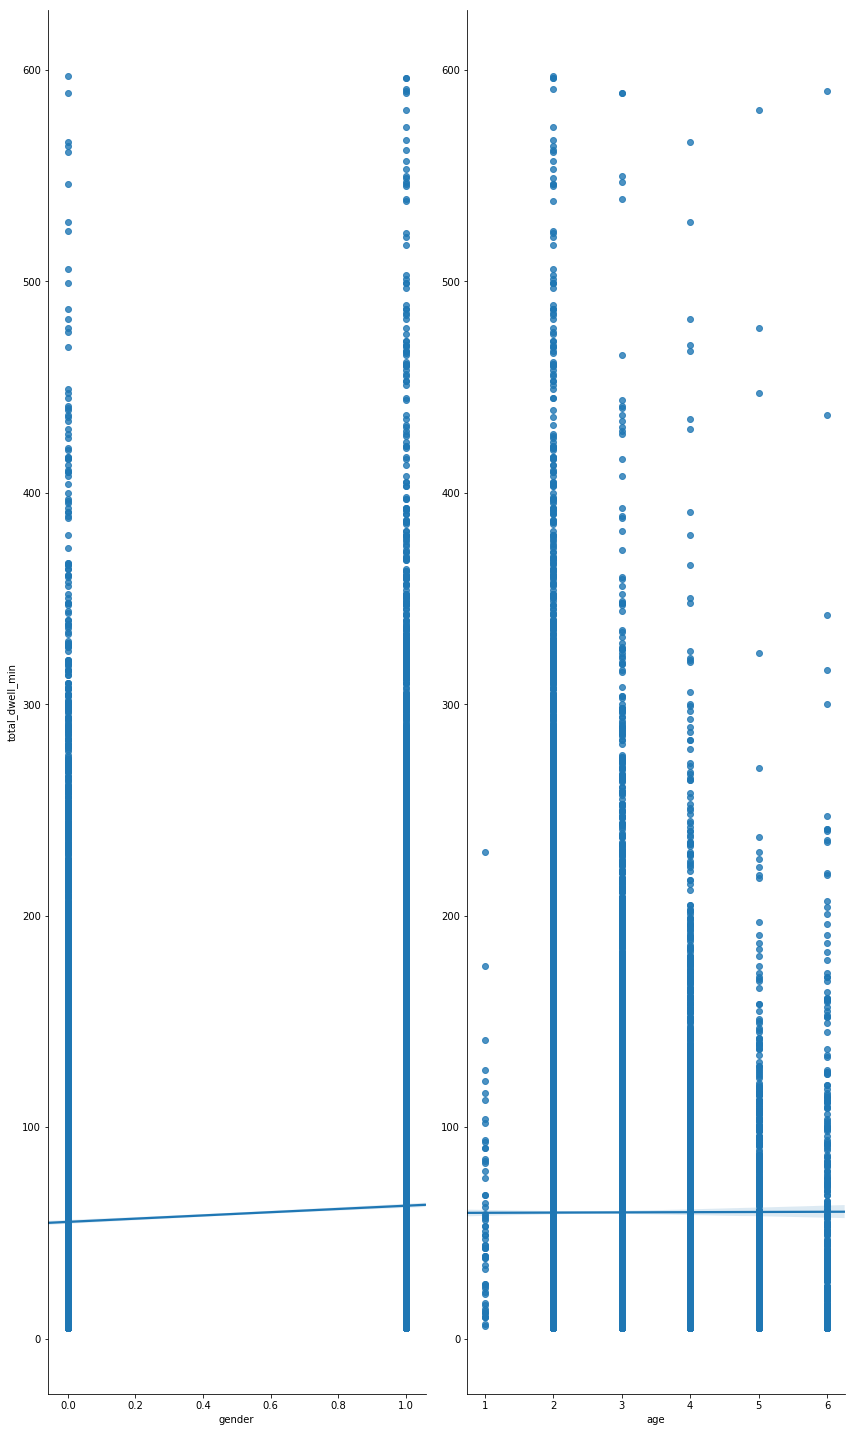

In [16]:
%matplotlib inline
sns_plot = sns.pairplot(df, x_vars=['gender','age'], y_vars='total_dwell_min', size=20, aspect=0.3, kind='reg')
sns_plot.savefig('Regression_gender_age_dwell_time.png')

In [17]:
dfemale = df.loc[df['gender']==1]

In [18]:
dfemale.head()

,visit_time_utc,login_type,age_range,gender,postal_code,total_dwell_min,top_space_1_name,top_space_1_dwell_min,top_space_2_name,top_space_2_dwell_min,...,top_space_56_dwell_min,top_space_57_name,top_space_57_dwell_min,top_space_58_name,top_space_58_dwell_min,top_space_59_name,top_space_59_dwell_min,top_space_60_name,top_space_60_dwell_min,age
1,2017-11-01,f,15~30,1,M6M 2A1,8,Hudson's Bay,8,Forever 21,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,2017-11-01,f,15~30,1,M8W1X6,7,Mappins,5,Sporting Life,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
10,2017-11-01,f,15~30,1,M9W4E9,310,Restoration Hardware,178,Levis,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
11,2017-11-01,f,30~45,1,M9N3R7,188,Michael Kors,152,Kate Spade,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
15,2017-11-01,f,15~30,1,M2K 1A3,323,Arc teryx,310,Walk & Wear Fine Shoe Repair,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [19]:
# plot without regression line
# sns.regplot(x=dfemale['age'], y=dfemale['total_dwell_min'], fit_reg=False)

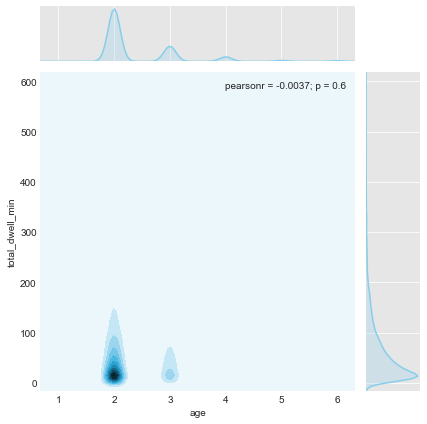

In [20]:
# various other options for scatter plots
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.jointplot(x=dfemale['age'], y=dfemale['total_dwell_min'], kind='kde', color='skyblue') # a 2-d contour plot
# sns.jointplot(x=dfemale['age'], y=dfemale['total_dwell_min'], kind='hex') # a hexbin plot
# sns.jointplot(x=dfemale['age'], y=dfemale['total_dwell_min'], kind='scatter') # a basic scatter plot
# sns.jointplot(x=dfemale['age'], y=dfemale['total_dwell_min'], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=1) # with customization
# sns_plot.savefig('Regression_females_age_dwell_time.png')

In [9]:
stores = df1['store_name'].unique().tolist()
for store in stores:
    print(store, '=' , df1['traffic_2'][df1['store_name'] == store].sum() )

Nadege Mens = 19886
Babaton Ladies = 146041
Ent H = 62300
Subway = 937491
Shoppers Mens = 92839
Shoppers Ladies = 135372
Tim Hortons = 1083874
Source = 1145263
Ent A1 PB = 344735
Ent A3 Sport Chek = 735572
Ent J3 Shoppers = 352678
Ent A2 Jamies = 275992
Holt Flow = 1092490
Go Transit = 131306
Scotia Flow = 1064227
Ent E = 79669
Ent G Microsoft = 328101
Harry Rosen Flow = 455034
E Parkade P1-N = 75623
Ent J1 = 84631
Starbucks Mens = 121926
Holt Renfrew Ext = 47662
E Parkade P2-S = 56663
E Parkade P4-S = 39889
E Parkade P5-S = 20704
Rest H CO = 178395
Pandora Mens = 144581
FC Ladies = 120919
E Parkade P1-S = 89987
F Parkade P1 = 255111
FC Elev N = 126461
E Parkade P3-N = 61516
FC Mens = 106876
Ent J2 = 49303
FC Elev S = 82778
E Parkade P4-N = 33815
E Parkade P5-N = 23026
Pandora Ladies = 198419
FC Esc N = 776381
Babaton Mens = 113983
Bvlgari Ladies = 127771
Bvlgari Mens = 109459
Starbucks Ladies = 140471
FC Emp Mens = 4322
Nadege Family = 7945
Starbucks Fam2 = 8299
Starbucks Fam1 = 10174

In [10]:
df1.dtypes

time_start    object
time_end      object
traffic_1      int64
traffic_2      int64
store_name    object
dtype: object

In [11]:
df1['day'] = pd.DatetimeIndex(df1['time_start']).day
df1['month'] = pd.DatetimeIndex(df1['time_start']).month
df1['year'] = pd.DatetimeIndex(df1['time_start']).year

In [12]:
import dateutil
df1['date'] = df1['time_start'].apply(dateutil.parser.parse, yearfirst=True)

In [13]:
df1['week'] = df1['date'].dt.week
df1.head(50)

,time_start,time_end,traffic_1,traffic_2,store_name,day,month,year,date,week
0,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Nadege Mens,1,12,2017,2017-12-01 00:00:00,48
1,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Babaton Ladies,1,12,2017,2017-12-01 00:00:00,48
2,2017-12-01 00:00:00,2017-12-01 00:15:00,1,1,Ent H,1,12,2017,2017-12-01 00:00:00,48
3,2017-12-01 00:00:00,2017-12-01 00:15:00,1,12,Subway,1,12,2017,2017-12-01 00:00:00,48
4,2017-12-01 00:00:00,2017-12-01 00:15:00,2,1,Shoppers Mens,1,12,2017,2017-12-01 00:00:00,48
5,2017-12-01 00:00:00,2017-12-01 00:15:00,0,1,Shoppers Ladies,1,12,2017,2017-12-01 00:00:00,48
6,2017-12-01 00:00:00,2017-12-01 00:15:00,4,13,Tim Hortons,1,12,2017,2017-12-01 00:00:00,48
7,2017-12-01 00:00:00,2017-12-01 00:15:00,4,13,Source,1,12,2017,2017-12-01 00:00:00,48
8,2017-12-01 00:00:00,2017-12-01 00:15:00,4,8,Ent A1 PB,1,12,2017,2017-12-01 00:00:00,48
9,2017-12-01 00:00:00,2017-12-01 00:15:00,0,5,Ent A3 Sport Chek,1,12,2017,2017-12-01 00:00:00,48


In [15]:
mens = ['Shoppers Mens','Nadege Mens','Harry Rosen Flow','Starbucks Mens','Pandora Mens','Bvlgari Mens','Babaton Mens','FC Mens','FC Emp Mens']
womens = ['Shoppers Ladies','Babaton Ladies','Holt Renfrew Ext','Holt Flow','FC Ladies','Pandora Ladies','Nadege Ladies','Starbucks Ladies',' Bvlgari Ladies','Pandora Nursing','FC Emp Ladies']
general = ['Subway','Tim Hortons','Source','Go Transit', 'Scotia Flow', 'Ent G Microsoft', 'Rest H CO', 'Nadege Family', 'Starbucks Fam2', 'Starbucks Fam1',
'Pandora Family','Nordstrom CO','Ent A3 Sport Chek','Ent J3 Shoppers','Ent A2 Jamies','Cheescake CO','Rest H Ext','Bay West J3']
parking =['FC Esc N','E Parkade P2-N','Ent E','F Parkade P2','E Parkade P3-S','Ent J2','FC Elev S','E Parkade P4-N',
'E Parkade P5-N','E Parkade P1-N','Ent J1','E Parkade P2-S','E Parkade P4-S','E Parkade P5-S','E Parkade P1-S','F Parkade P1',
'FC Elev N','E Parkade P3-N','Ent F Valet','E Parkade P1-E','F Parkade Holt P2','Nord P1 East','Bay North A1','F Parkade Holt P1','C Park Nord L2',
'E Parkade P5-E','E Parkade P4-E','C Park Nord L1','E Parkade P3-E','E Parkade P2-E','Ent H','Ent A1 PB'  ]

In [16]:
mens_data = df1[ df1['store_name'].isin(mens)]
# week1 = mens_data[(mens_data['date'] > '2017-12-03') & (mens_data['date'] <= '2017-12-09')]

In [17]:
# visit_mask = df1['traffic_2']
mens_mask = df1['store_name'].isin(mens)

In [18]:
df1['mens'] = df1['store_name'].isin(mens)
df1['womens'] = df1['store_name'].isin(womens)
df1['general'] = df1['store_name'].isin(general)
df1['parking'] = df1['store_name'].isin(parking)
df1[31950:32000]

,time_start,time_end,traffic_1,traffic_2,store_name,day,month,year,date,week,mens,womens,general,parking
31950,2017-12-07 10:15:00,2017-12-07 10:30:00,12,1,Holt Renfrew Ext,7,12,2017,2017-12-07 10:15:00,49,False,True,False,False
31951,2017-12-07 10:15:00,2017-12-07 10:30:00,4,2,FC Elev S,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31952,2017-12-07 10:15:00,2017-12-07 10:30:00,5,3,E Parkade P1-E,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31953,2017-12-07 10:15:00,2017-12-07 10:30:00,2,5,Nordstrom CO,7,12,2017,2017-12-07 10:15:00,49,False,False,True,False
31954,2017-12-07 10:15:00,2017-12-07 10:30:00,49,13,Bay North A1,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31955,2017-12-07 10:15:00,2017-12-07 10:30:00,6,4,Nord P1 East,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31956,2017-12-07 10:15:00,2017-12-07 10:30:00,45,58,Nordstrom CO,7,12,2017,2017-12-07 10:15:00,49,False,False,True,False
31957,2017-12-07 10:15:00,2017-12-07 10:30:00,9,0,E Parkade P2-S,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31958,2017-12-07 10:15:00,2017-12-07 10:30:00,8,0,F Parkade Holt P1,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True
31959,2017-12-07 10:15:00,2017-12-07 10:30:00,8,0,E Parkade P3-E,7,12,2017,2017-12-07 10:15:00,49,False,False,False,True


In [19]:
traffic_men = df1.groupby( [ df1['week'], df1['month'], df1['year'], df1['mens']])['traffic_2'].sum().reset_index()
traffic_women = df1.groupby( [ df1['week'], df1['month'], df1['year'], df1['womens'] ])['traffic_2'].sum().reset_index()
traffic_men = traffic_men[ traffic_men.mens] # to extract only the values where mens==True
traffic_men.head(100)

,week,month,year,mens,traffic_2
1,1,1,2018,True,97418
3,2,1,2018,True,76808
5,3,1,2018,True,75892
7,4,1,2018,True,75104
9,5,1,2018,True,24018
11,5,2,2018,True,48909
13,6,2,2018,True,67268
15,7,2,2018,True,90741
17,8,2,2018,True,75934
19,9,2,2018,True,20105


In [20]:
traffic_men.drop(['mens'], axis=1,inplace=True)

In [21]:
traffic_men.rename(index=str, columns={'traffic_2':'men'})

,week,month,year,men
1,1,1,2018,97418
3,2,1,2018,76808
5,3,1,2018,75892
7,4,1,2018,75104
9,5,1,2018,24018
11,5,2,2018,48909
13,6,2,2018,67268
15,7,2,2018,90741
17,8,2,2018,75934
19,9,2,2018,20105


In [22]:
traffic_women = traffic_women[ traffic_women.womens] # to extract only the values where womens==True
traffic_women.rename(index=str, columns={'traffic_2':'women'})
traffic_women.head(100)

,week,month,year,womens,traffic_2
1,1,1,2018,True,159116
3,2,1,2018,True,121458
5,3,1,2018,True,124547
7,4,1,2018,True,123207
9,5,1,2018,True,40429
11,5,2,2018,True,79418
13,6,2,2018,True,109867
15,7,2,2018,True,147460
17,8,2,2018,True,122811
19,9,2,2018,True,32916


In [23]:
combined = traffic_men
combined.rename(index=str, columns={'traffic_2':'men'})

,week,month,year,men
1,1,1,2018,97418
3,2,1,2018,76808
5,3,1,2018,75892
7,4,1,2018,75104
9,5,1,2018,24018
11,5,2,2018,48909
13,6,2,2018,67268
15,7,2,2018,90741
17,8,2,2018,75934
19,9,2,2018,20105


In [24]:
combined.columns.tolist()

['week', 'month', 'year', 'traffic_2']

In [25]:
combined['women'] =  traffic_women['traffic_2']
combined.head(100)

,week,month,year,traffic_2,women
1,1,1,2018,97418,159116
3,2,1,2018,76808,121458
5,3,1,2018,75892,124547
7,4,1,2018,75104,123207
9,5,1,2018,24018,40429
11,5,2,2018,48909,79418
13,6,2,2018,67268,109867
15,7,2,2018,90741,147460
17,8,2,2018,75934,122811
19,9,2,2018,20105,32916


In [26]:
combined.rename(index=str, columns={'traffic_2':'men'},inplace=True)

In [27]:
combined.sort_values(by=['year', 'week'], inplace=True)

combined2 = traffic_men.append(traffic_women)
combined2.reset_index(drop=True)
combined2.head(100)

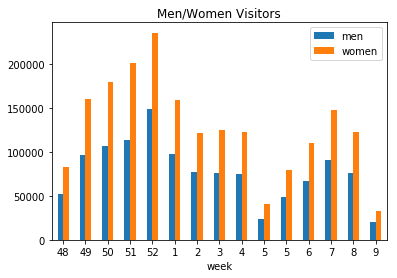

In [37]:
combined.plot(x='week', y=['men', 'women'], kind='bar')
plt.xticks(rotation=0)
plt.title('Men/Women Visitors')
plt.savefig('Men_Women visitors', dpi=300, edgecolor='w',bbox_inches="tight")
plt.show()

In [33]:
total_traffic = df1.groupby( [ df1['week'], df1['month'], df1['year'], df1['parking']])['traffic_2'].sum().reset_index()
total_traffic = total_traffic[ total_traffic.parking]
total_traffic.rename(index=str, columns={'traffic_2':'visitors'},inplace=True)
total_traffic.head()

,week,month,year,parking,visitors
1,1,1,2018,True,249321
3,2,1,2018,True,196851
5,3,1,2018,True,200330
7,4,1,2018,True,191603
9,5,1,2018,True,61803


In [34]:
total_traffic.sort_values(by=['year', 'week'], inplace=True)

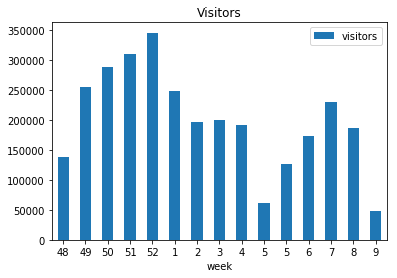

In [39]:
total_traffic.plot(x='week', y=['visitors'], kind='bar')
plt.xticks(rotation=0)
plt.title('Visitors')
plt.savefig('Visitors.png', dpi=300, edgecolor='w',bbox_inches="tight")
plt.show()